In [2]:
#File: crossValidation.ipynb
#Purpose: use cross validation to evaluate the model
#Author: Quan Gan
import fasttext
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
from sklearn.model_selection import KFold

In [4]:
#Method: trainModel
#Purpose: train fastText model
#Paremater: trainSet -> the trainSet file path
#           input_word_vector -> the pretrained word vector file path
def trainModel(trainSet, input_word_vector, LR, Epoch):
    model = fasttext.train_supervised(input = trainSet,
                                      dim = 300,
                                      lr = LR,
                                      epoch = Epoch,
                                      loss ='ova',
                                      pretrainedVectors = input_word_vector)
    return model

In [5]:
#Method: cross_Validation
#Purpose: use cross validation to evaluate the result
#Parameter: df -> the input data
#           NFold -> number of fold
def cross_Validation(df, NFold, lr, epoch):
    kfold = KFold(n_splits=NFold, shuffle=True, random_state=1)
    precision = 0
    recall = 0
    for train, test in kfold.split(df):
        df.iloc[train].to_csv('train.train', header=False, index=False)
        df.iloc[test].to_csv('test.valid', header=False, index=False)
   
        model = trainModel('train.train', '../data/crawl-300d-2M-subword.vec', lr, epoch)
        result = model.test('test.valid', k=1)

        precision += result[1]
        recall += result[2]
        os.remove('test.valid')
        os.remove('train.train')
    print("{} fold Cross Validation".format(NFold))
    print("Precision:", round(precision/NFold, 4))
    print("Recall:", round(recall/NFold,4))
    return round(precision/NFold, 4), round(recall/NFold,4)

In [6]:
def diffSizeCV(dataFrame, lr, epoch, step, kfold, seed):
    result = pd.DataFrame(columns=['amount', 'Precision@1', 'Recall@1'])

    count = step
    temp = dataFrame
    train = pd.DataFrame()
    while len(temp) != 0:
        current = temp.sample(n = count, random_state=seed)
        train = pd.concat([train, current])
        precision, recall = cross_Validation(train, kfold, lr, epoch)
        result = pd.concat([result, pd.DataFrame([[len(train), precision, recall]], columns=['amount', 'Precision@1', 'Recall@1'])], ignore_index=True)
        cond = temp[0].index.isin(current[0].index)
        temp = temp.loc[~cond]   
        count = min(step, len(temp))
    return result

In [7]:
def drawGraph(df, title, amount,ylim=[0, 100]):
    fig = plt.figure(figsize=[10,5])
    ax = fig.add_subplot()

    p = ax.plot(df['amount'], df['Precision@1']*100, label='Precision')
    r = ax.plot(df['amount'], df['Recall@1']*100, label='Recall')

    for i, rect in enumerate(df.index):
        ax.text(df['amount'][i]-5, df['Precision@1'][rect]*100+1,  round(df['Precision@1'][rect]*100, 4), color='blue')

    for j, rect1 in enumerate(df.index):
        ax.text(df['amount'][j]-5, df['Recall@1'][rect1]*100-1.5,  round(df['Recall@1'][rect1]*100, 4), color='orange')

    ax.set_ylim(ylim)
    plt.legend(loc='upper left')
    plt.xlabel('Record counts')
    plt.ylabel('Scores')
    plt.title(f'{title} performance {amount} records')

In [83]:
df_DwC = pd.read_csv('../data/cleanedData.txt', header= None)
DwC_result = diffSizeCV(df_DwC, 0.5, 20, 100, 5, 2)

5 fold Cross Validation
Precision: 0.79
Recall: 0.7671
5 fold Cross Validation
Precision: 0.87
Recall: 0.841
5 fold Cross Validation
Precision: 0.8867
Recall: 0.8611
5 fold Cross Validation
Precision: 0.915
Recall: 0.8934
5 fold Cross Validation
Precision: 0.926
Recall: 0.9031
5 fold Cross Validation
Precision: 0.9233
Recall: 0.9023
5 fold Cross Validation
Precision: 0.9243
Recall: 0.9024
5 fold Cross Validation
Precision: 0.9337
Recall: 0.9134
5 fold Cross Validation
Precision: 0.9211
Recall: 0.9012
5 fold Cross Validation
Precision: 0.9307
Recall: 0.9115


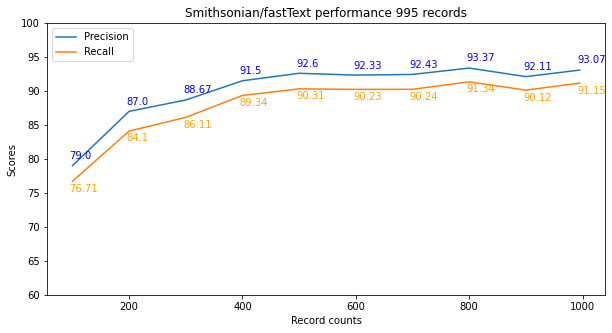

In [90]:
drawGraph(DwC_result, 'Smithsonian/fastText', len(df_DwC), [60, 100])

In [8]:
#SESAR specimen type
SESAR_specimenType = pd.read_csv('../Collections_data/cleanedSESAR_specimenType.txt', header= None)
SESAR_specimenType_result = diffSizeCV(SESAR_specimenType, 0.1, 20, 100, 5, 1)

5 fold Cross Validation
Precision: 0.9495
Recall: 0.9495
5 fold Cross Validation
Precision: 0.9746
Recall: 0.9746
5 fold Cross Validation
Precision: 0.9899
Recall: 0.9899
5 fold Cross Validation
Precision: 0.99
Recall: 0.99
5 fold Cross Validation
Precision: 0.9899
Recall: 0.9899
5 fold Cross Validation
Precision: 0.9883
Recall: 0.9883
5 fold Cross Validation
Precision: 0.9871
Recall: 0.9871
5 fold Cross Validation
Precision: 0.99
Recall: 0.99
5 fold Cross Validation
Precision: 0.9911
Recall: 0.9911
5 fold Cross Validation
Precision: 0.993
Recall: 0.993


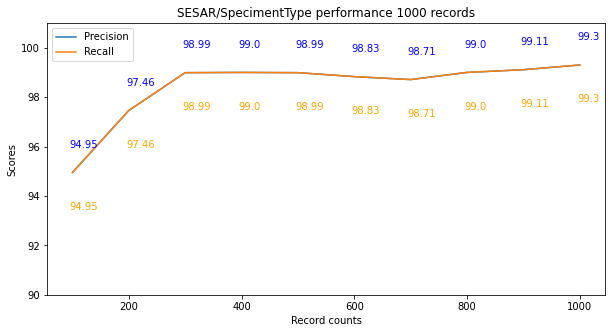

In [9]:
drawGraph(SESAR_specimenType_result, 'SESAR/SpecimentType', len(SESAR_specimenType), [90, 101])

In [26]:
#SESAR material type
SESAR_materialType = pd.read_csv('../Collections_data/cleanedSESAR_materialType.txt', header= None)
SESAR_materialType_result = diffSizeCV(SESAR_materialType, 1, 20, 100, 5, 1)

5 fold Cross Validation
Precision: 0.8089
Recall: 0.8089
5 fold Cross Validation
Precision: 0.8892
Recall: 0.8892
5 fold Cross Validation
Precision: 0.8929
Recall: 0.8929
5 fold Cross Validation
Precision: 0.9072
Recall: 0.9072
5 fold Cross Validation
Precision: 0.9257
Recall: 0.9257
5 fold Cross Validation
Precision: 0.9331
Recall: 0.9331
5 fold Cross Validation
Precision: 0.9238
Recall: 0.9238
5 fold Cross Validation
Precision: 0.9336
Recall: 0.9336
5 fold Cross Validation
Precision: 0.9431
Recall: 0.9431
5 fold Cross Validation
Precision: 0.9499
Recall: 0.9499


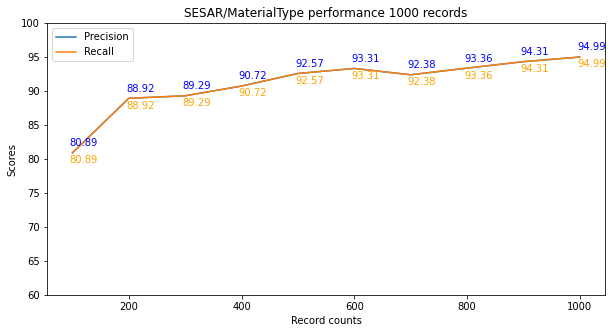

In [27]:
drawGraph(SESAR_materialType_result, 'SESAR/MaterialType', len(SESAR_materialType), [60, 100])

In [28]:
#SESAR sampled feature
SESAR_sampledFeature = pd.read_csv('../Collections_data/cleanedSESAR_sampeldFeature.txt', header= None)
SESAR_sampledFeatureype_result = diffSizeCV(SESAR_sampledFeature, 0.1, 20, 100, 5, 1)

5 fold Cross Validation
Precision: 1.0
Recall: 1.0
5 fold Cross Validation
Precision: 0.9897
Recall: 0.9897
5 fold Cross Validation
Precision: 0.9899
Recall: 0.9899
5 fold Cross Validation
Precision: 0.9949
Recall: 0.9949
5 fold Cross Validation
Precision: 0.994
Recall: 0.994
5 fold Cross Validation
Precision: 0.9949
Recall: 0.9949
5 fold Cross Validation
Precision: 0.9914
Recall: 0.9914
5 fold Cross Validation
Precision: 0.995
Recall: 0.995
5 fold Cross Validation
Precision: 0.9967
Recall: 0.9967
5 fold Cross Validation
Precision: 0.995
Recall: 0.995


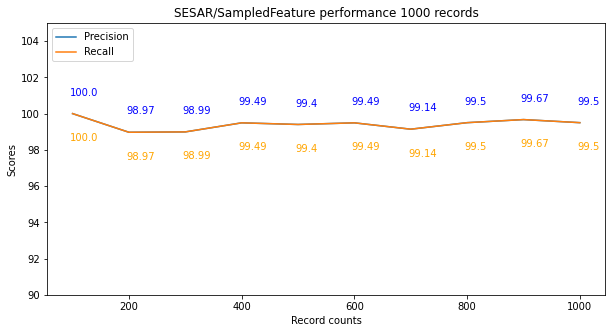

In [31]:
drawGraph(SESAR_sampledFeatureype_result, 'SESAR/SampledFeature', len(SESAR_sampledFeature), [90, 105])